# Homework 5 (DUE: 22nd April  11:59pm HK Time)

---
*See detailed instruction for homework submission*

*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment goes over the topics of radiometry, reflectance, and photometric stereo.

In [2]:
### Setup #
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'csci3330/hw5'
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Mounted at /content/drive
/content/drive/My Drive/csci3330/hw5


---
## Part 1. Simple Rendering (15 points)
Obtain the file bunny.npy from the data folder of this assignment and load it into Python. there is a single variable in this file: the variable $N$ is an $h\times w \times 3$ array of surface normals.

Implement the function **`renderLambertainImage`** in **`photometric.py`** which takes the albedo map, surface normal, and light source as inputs and generates a rendered image.

Now, assume uniform unit albedo, render the images under three light sources from three directions: $L_1=(0,0,1)$, $L_2=(0,1,0)$, and $L_3=(1,0,0)$

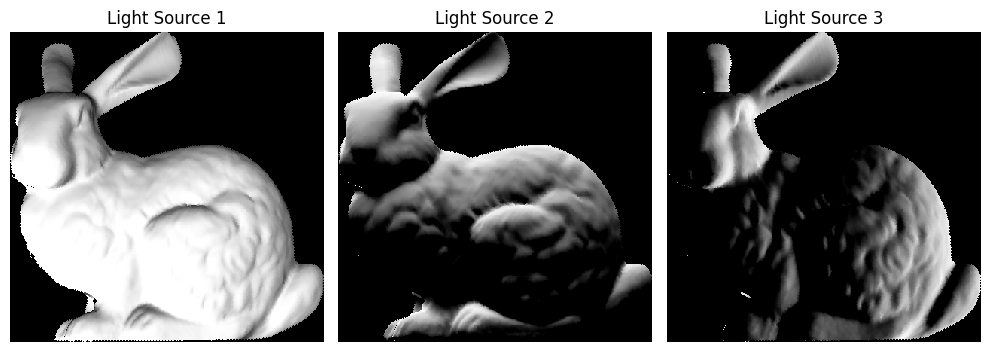

In [3]:
from photometric import renderLambertianImage

# surface normal
bunny_sn = np.load('data/bunny.npy')
# print(bunny_sn.shape)   # (413, 417, 3)
# print(bunny_sn)
# print(np.max(bunny_sn), np.min(bunny_sn))
# print(np.sum(bunny_sn ** 2, axis=-1))
# array =  np.sum(bunny_sn ** 2, axis=-1)
# print(np.count_nonzero((array != 0) & (array != 1)))
# tolerance=1e-6
# print("non zero or one", np.count_nonzero((np.abs(array - 0) > tolerance) & (np.abs(array - 1) > tolerance)))

# albedo
h, w, _ = bunny_sn.shape
bunny_albedo = np.ones((h, w))

# source
light_sources = [np.array([0, 0, 1]).reshape(1,1,3), np.array([0, 1, 0]).reshape(1,1,3), np.array([1, 0, 0]).reshape(1,1,3)]


# Render the images under different light sources
rendered_images = []
for source in light_sources:
    rendered_image = renderLambertianImage(bunny_albedo, bunny_sn, source)
    rendered_images.append(rendered_image)


# Display the rendered images
titles = ['Light Source 1', 'Light Source 2', 'Light Source 3']
plt.figure()
for i in range(len(rendered_images)):
    plt.subplot(1, len(rendered_images), i+1)
    plt.imshow(rendered_images[i])
    # print(rendered_images[i])
    # print(np.max(rendered_images[i]), np.min(rendered_images[i]))

    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

###
# when the light is from back, there is -1 in the rendered image?

---
## Part 2: Photometric Stereo (60 points)
In this part, you are going to implement Photometric Stereo algorithm to recover the surface normal and albedo of an object under multiple illuminations. In the folder **`data/PhotometricStereo`** we have a set of seven images of a face, measured using a near-orthographic camera with fixed viewpoint and under different illuminations. These images are avaiable as files **`data/PhotometricStereo/female_N.tif`** where $N={1,\cdots,7}$. These images are linear images, corresponding to RAW files that have been demosaicked and converted to the linear sRGB color space. Once we convert these images into grayscale, we can stack them into a matrix $I$ of sze $7\times P$, where $P$ is the number of pixels of each grayscale image channel.

Additionally, the file **`data/sources.npy`** has the $3\times 7$ matrix $L$, where each row of matrix $L$ represents the $3\times 1$ vector of the direction of the light source $l_i$.

Our goal is to recover the surface normal $n$ and the albedo $a$ at each pixel of the image. As we did in class, it will be convenient to consider at each pixel the pseudo-normal $b=a\cdot n$. We can stack the pseduo-normals for all pixels into a $3\times P$ matrix $B$.

Photometric stereo relies on the "n-dot-l" shading model we discussed in class, which is valid under directional light and Lambertian reflectance. Under this model, we can related the matrices $I$, $L$, and $B$ as follows

$$
I=L^T\cdot B
$$

Given that $I$ and $L$ are known, we can recover the unknown matrix $B$ by simply solving the linear system above in the least-square sense. Then, from $B$, we can use normalization to recover estimates for the $1\times P$ albedo matrix $A$ and the $3\times P$ normal matrix $N$. Finally, we can use the normal field to recover a surface, in the form of a height field $Z=f(x,y)$ through the integration of surface normals.
visualize surface normal

Implement the functions **`estimate`** in the file **`photometric.py`**




Use the recovered the surface normal and albedo map, render the surface under two new directional light sources $L_1=(0, 0, -1)$ and $L_2=(0, 1, 0)$

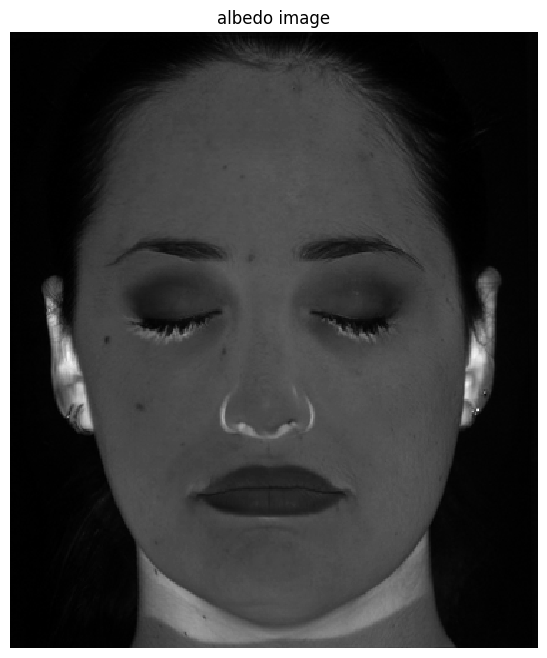

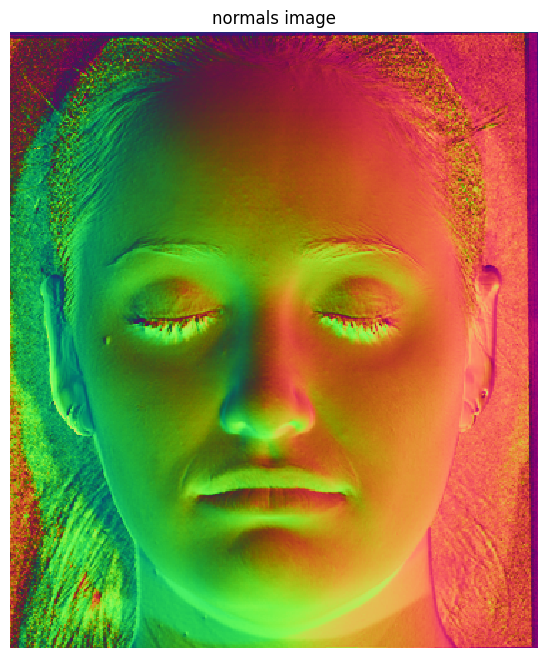

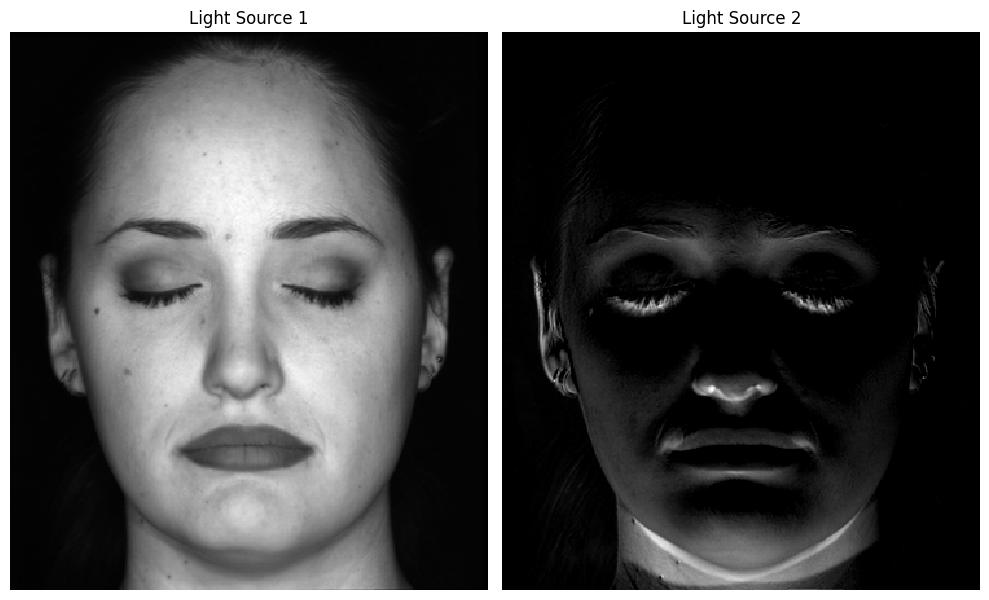

In [4]:
from photometric import loadData, estimatePseudonormalsCalibrated, estimateAlbedosNormals, displayAlbedosNormals

# load data
I, L, s = loadData('data/')
# print(I.shape, L.shape, s)  # (7, 159039) (3, 7) (431, 369)

# pseudo norm
B = estimatePseudonormalsCalibrated(I, L)
# print(B.shape)  # (3, 159039)
# print(B)

# get albedos, normals
albedos, normals = estimateAlbedosNormals(B)
# print(albedos.shape, normals.shape) # (159039, ) (3, 159039)

# get albedoIm, normalIm
albedoIm, normalIm = displayAlbedosNormals(albedos, normals, s)
# print(albedoIm.shape, normalIm.shape)   # (431, 369) (431, 369, 3)
# print(albedoIm)
# print(normalIm)

# display
# albedo image
plt.imshow(albedoIm)
plt.axis('off')
plt.title("albedo image")
plt.show()

# normal image
normalized_normals = (normalIm + 1) / 2
# print(normalized_normals.shape)
plt.imshow(normalized_normals)
plt.axis('off')
plt.title("normals image")
plt.show()

# rendered image
# source
light_sources = [np.array([0, 0, -1]).reshape(1,1,3), np.array([0, 1, 0]).reshape(1,1,3)]

# Render the images under different light sources
rendered_images = []
for source in light_sources:
    rendered_image = renderLambertianImage(albedoIm, normalIm, source)
    rendered_images.append(rendered_image)

# Display the rendered images
titles = ['Light Source 1', 'Light Source 2']
plt.figure()
for i in range(len(rendered_images)):
    plt.subplot(1, len(rendered_images), i+1)
    plt.imshow(rendered_images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()



You can now use the normal field to compute a surface $Z=f(x,y)$. First, compute from the normals the derivatives $(\partial f/\partial x, \partial f/\partial y)$. Then integrate the derivatives using the provided function **`integrateFrankot`** in the file **`photometric.py`** to recover the surface $Z(x,y)$. Display the recovered shape, both as a depth image, and as a 3D surface.

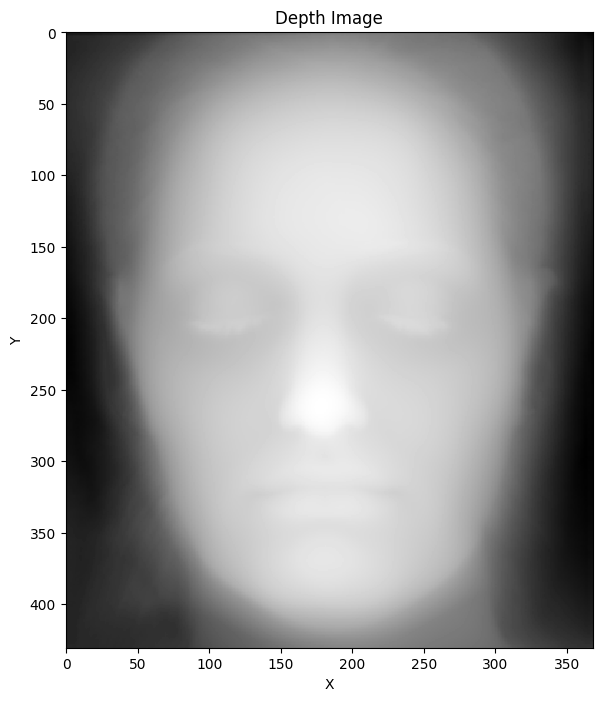

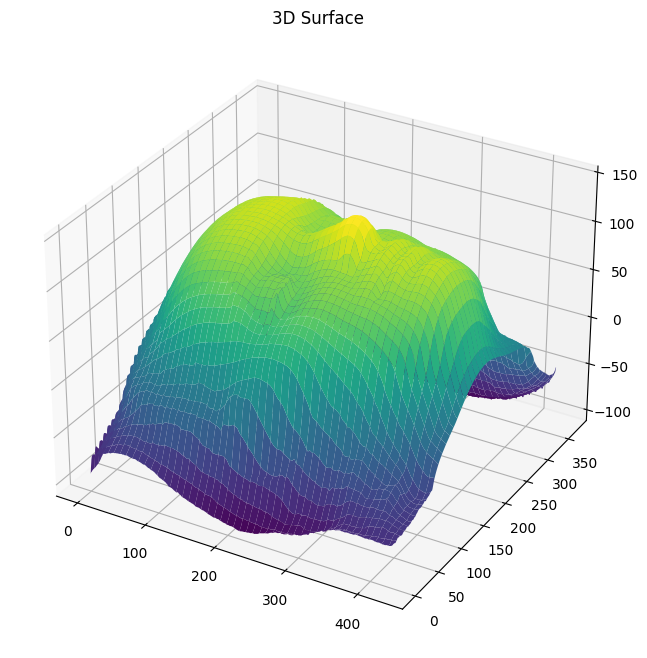

In [5]:
from photometric import estimateShape, plotSurface

# get surface
surface = estimateShape(normals, s)

# plot
# depth image
ax = plt.figure().add_subplot(111)
ax.imshow(surface, cmap='gray')
ax.set_title('Depth Image')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# 3D surface
plotSurface(surface)

---
## Part 3: Photometric Stereo (25 points)
This part is similar to part 2, you are also going to implement Photometric Stereo algorithm to recover the surface normal and albedo of an object under multiple illuminations. However, you need to first generate 50 grayscale images with Light source data/lights.npy from the object "bunny" in part 1 with fixed view point. Then you can recover the surface normal n and the albedo a with the generated 50 images like part 2. Visualize the recovered shape, both as a depth image, and as a 3D surface.

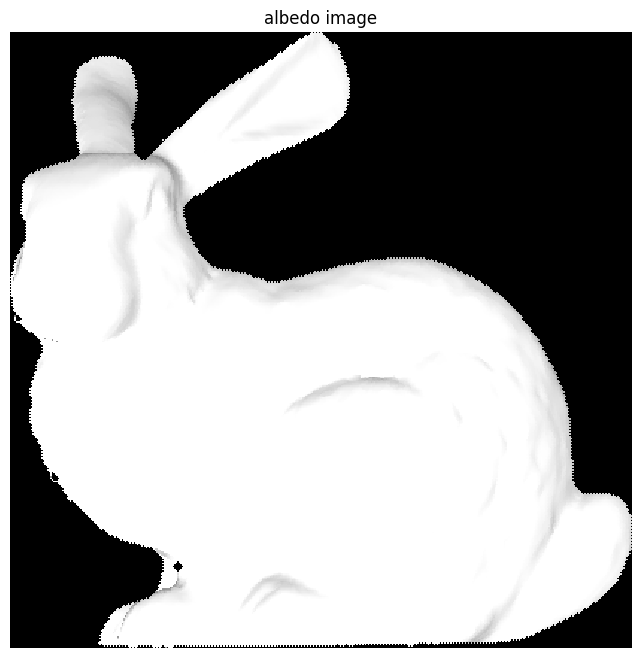

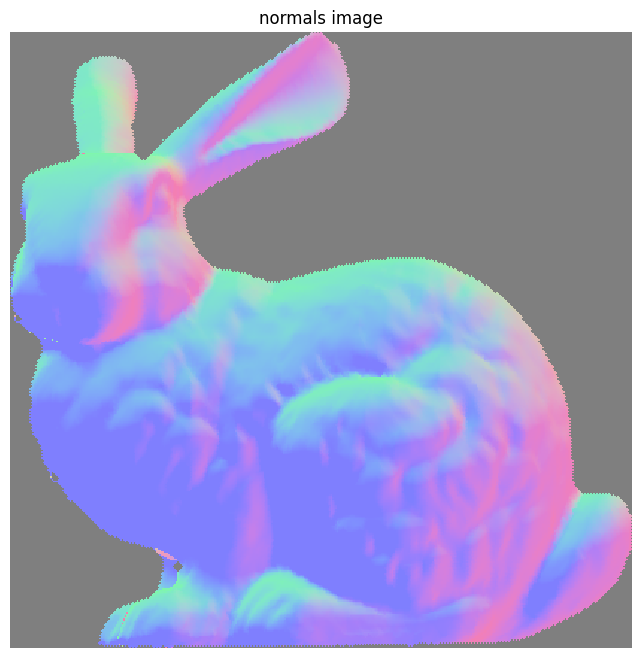

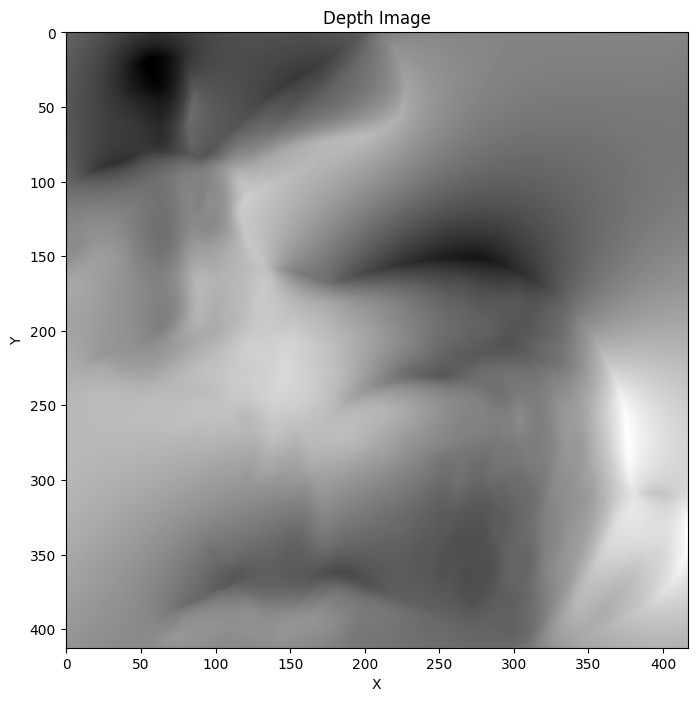

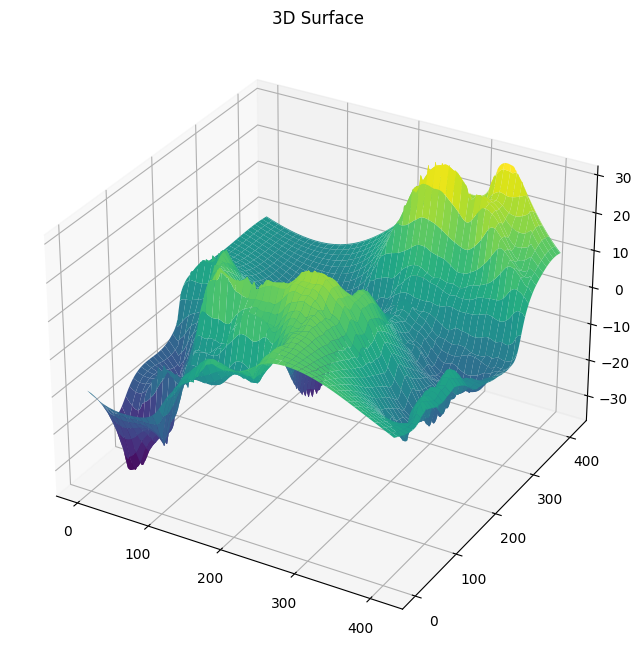

In [6]:
# generate image
# load
bunny_sn = np.load('data/bunny.npy')
lights = np.load('data/lights.npy')
# print(lights.shape)   # (50, 3)

# render
rendered_images = []
for i in range(50):
    source = lights[i].reshape(1, 1, 3)
    rendered_image = renderLambertianImage(bunny_albedo, bunny_sn, source)
    rendered_images.append(rendered_image)


# recover albedo and normal
# get I, L, s
flattened_imgs = []
for image in rendered_images:
    flattened_imgs.append(image.reshape(-1))
I = np.stack(flattened_imgs, axis=0)
L = lights.T
s = rendered_images[0].shape

# pseudo norm
B = estimatePseudonormalsCalibrated(I, L)

# get albedos, normals
albedos, normals = estimateAlbedosNormals(B)

# get albedoIm, normalIm
albedoIm_bunny_predicted, normalIm_bunny_predicted = displayAlbedosNormals(albedos, normals, s)

# visualize
# albedo image
plt.imshow(albedoIm_bunny_predicted)
plt.axis('off')
plt.title("albedo image")
plt.show()

# normal image
normalized_normals = (normalIm_bunny_predicted + 1) / 2
# print(normalized_normals.shape)
plt.imshow(normalized_normals)
plt.axis('off')
plt.title("normals image")
plt.show()

# get surface
surface = estimateShape(normals, s)

# plot
# depth image
ax = plt.figure().add_subplot(111)
ax.imshow(surface, cmap='gray')
ax.set_title('Depth Image')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# 3D surface
plotSurface(surface)

Render the images under three light sources from three directions: $L_1=(0,0,1)$, $L_2=(0,1,0)$, and $L_3=(1,0,0)$ and compare them with those in Part I.

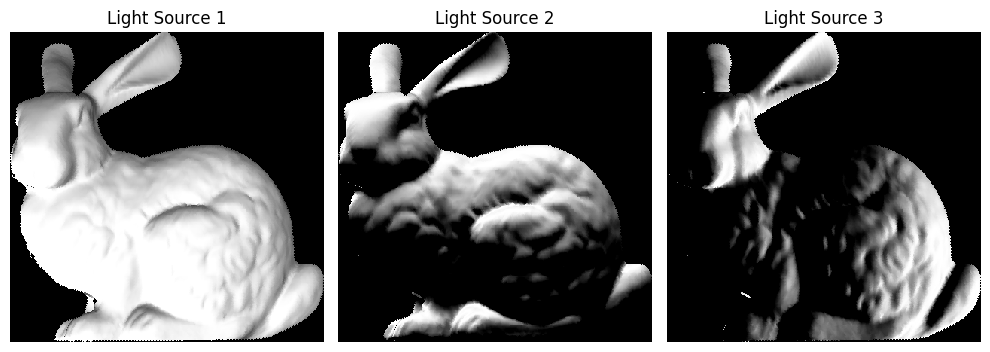

In [7]:
# Display the rendered images
light_sources = [np.array([0, 0, 1]).reshape(1,1,3), np.array([0, 1, 0]).reshape(1,1,3), np.array([1, 0, 0]).reshape(1,1,3)]

titles = ['Light Source 1', 'Light Source 2', 'Light Source 3']
plt.figure(figsize=(10, 5))

rendered_images_predicted = []
for source in light_sources:
    rendered_image_predicted = renderLambertianImage(albedoIm_bunny_predicted, normalIm_bunny_predicted, source)
    rendered_images_predicted.append(rendered_image_predicted)

for i in range(len(rendered_images_predicted)):
    plt.subplot(1, len(rendered_images_predicted), i+1)
    plt.imshow(rendered_images_predicted[i])

    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

---
**Acknowledgement**: This homework was developed based on a similar assignment from the computer vision course 16385 taught by Prof. Ioannis Gkioulekas (CMU).